# Clustering - Decision Tree

Using the new_df_without_outliers_copy_smote_resampled.xlsx
- Perform feature selection using a decision tree to select the most important features.
- Visualize how the decision tree partitions the data based on these selected features. This visualization helps to understand how the decision tree divides the data into different clusters or groups.

Features we using:
- Age
- Hypertension
- Heart_disease
- BMI
- HbA1c_level
- Blood_glucose_level
- Smoking_history_encoded
- Gender_encoded

In [22]:
# !pip install six


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

In [2]:
# We will be using the new_df_without_outliers_copy_smote_resampled.xlsx
df = pd.read_excel('new_df_without_outliers_copy_smote_resampled.xlsx')
df.sample(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
138770,0.784649,0,0,1.775939,0.566400,-0.206292,-1.090170,-0.974068,1
158487,0.574290,0,0,-0.429007,0.031403,-0.539352,0.263730,1.211318,1
178299,1.349487,0,0,-0.238498,2.231815,-0.317312,1.474867,1.211318,1
2858,-2.296460,0,0,-1.805575,0.529090,-1.649552,-1.579747,-0.974068,0
162486,1.349487,0,0,1.019774,0.141419,0.104564,1.636068,0.928339,1


In [7]:
# Assuming 'X' is your feature matrix and 'y' is your target vector
selected_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_encoded', 'gender_encoded']
X = df
y = df['diabetes']


(process:11400): GLib-GIO-WARNING **: 17:36:35.212: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.124.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.126694 to fit



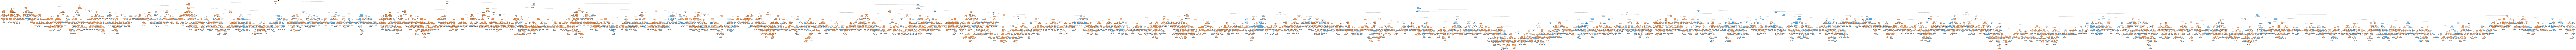

In [9]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X[selected_features], y)

# Export the decision tree to a Graphviz format
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=selected_features,  
                           filled=True, rounded=True,  
                           special_characters=True) 

# Create the graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree
Image(graph.create_png())

Evaluation of Decision Tree

In [ ]:
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

In [ ]:
# Precision and Recall
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f_measure = metrics.f1_score(y_test, predictions)
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)